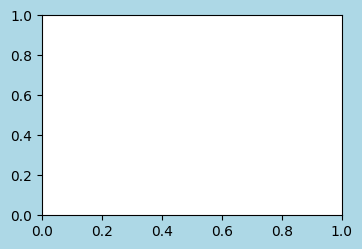

In [2]:
# Adding single Axes at a time

import matplotlib.pyplot as plt
import numpy as np

w, h = 4, 3
margin = 0.5
fig = plt.figure(figsize=(w, h), facecolor='lightblue')
ax = fig.add_axes([margin / w, margin / h, (w - 2 * margin) / w,
                        (h - 2 * margin) / h])

Text(0.5, 0.98, 'plt.subplots()')

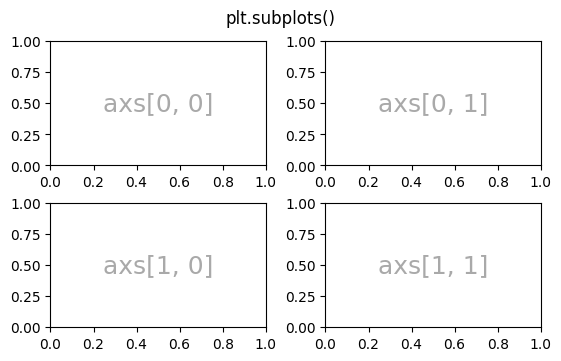

In [4]:
# Basic 2x2 grid

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

In [ ]:
# We will annotate a lot of Axes, so let's encapsulate 
# the annotation, rather than having that large piece 
# of annotation code every time we need it:

def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'plt.subplot_mosaic()')

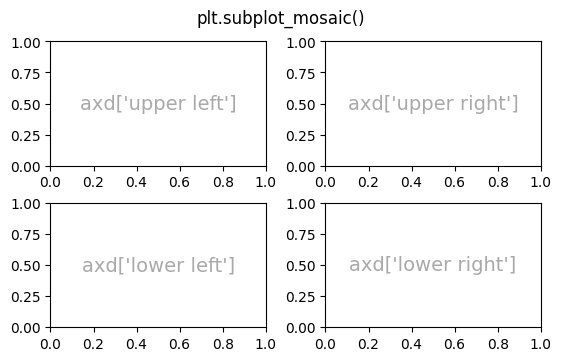

In [8]:
# The same effect can be achieved with subplot_mosaic, 
# but the return type is a dictionary instead of an 
# array, where the user can give the keys useful 
# meanings. Here we provide two lists, each list 
# representing a row, and each element in the list a 
# key representing the column.

fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                               figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

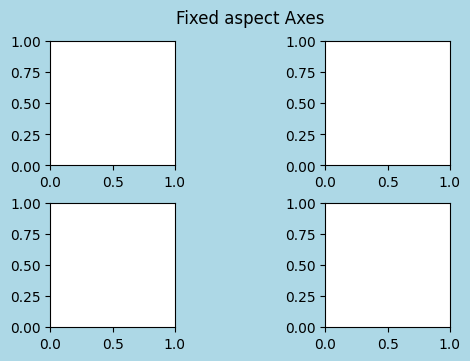

In [10]:
# Grids of fixed-aspect ratio Axes

fig, axs = plt.subplots(2, 2, layout="constrained",
                        figsize=(5.5, 3.5), facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
    fig.suptitle('Fixed aspect Axes')

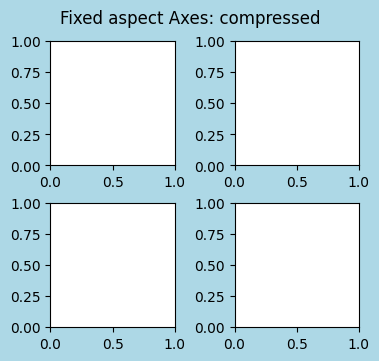

In [11]:
fig, axs = plt.subplots(2, 2, layout="compressed", figsize=(5.5, 3.5),
                        facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
    fig.suptitle('Fixed aspect Axes: compressed')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

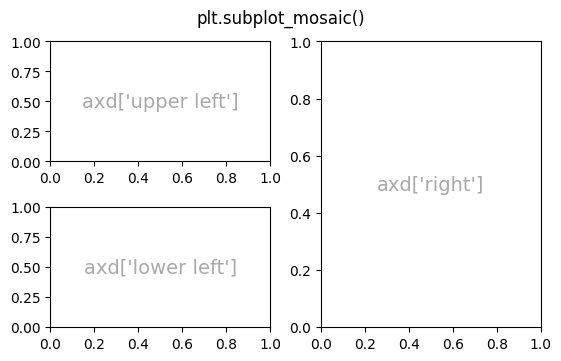

In [12]:
# Axes spanning rows or columns in a grid

fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                               figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

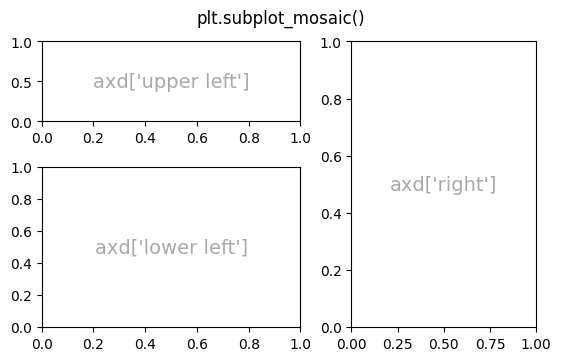

In [13]:
# Variable widths or heights in a grid

gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                               gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                               layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.02, 0.5, 'ylabel for subfigs[1]')

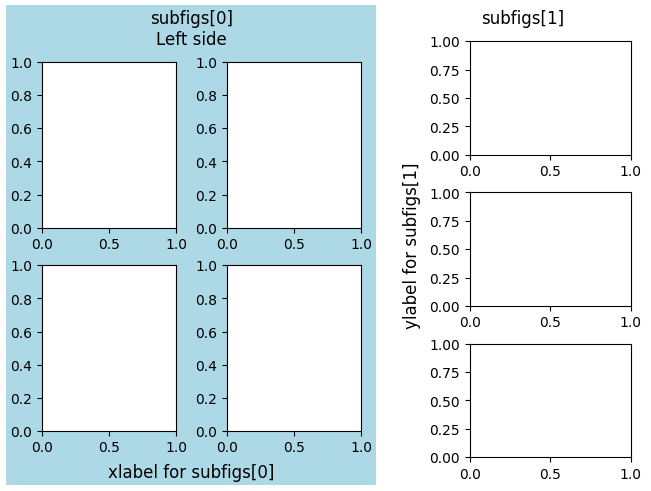

In [14]:
# Nested Axes layouts

fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

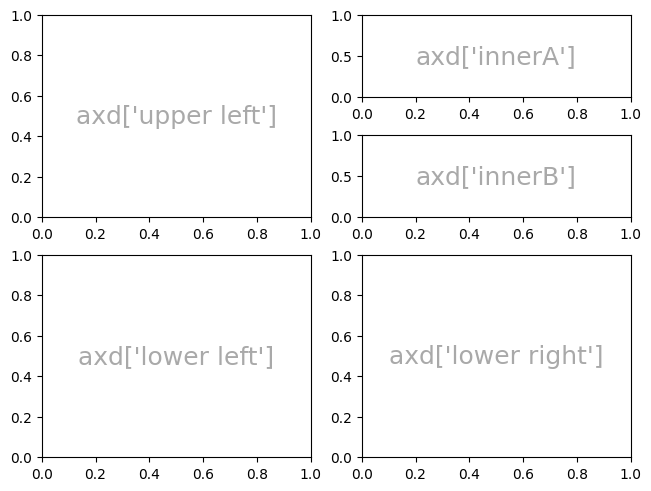

In [15]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left', inner],
         ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

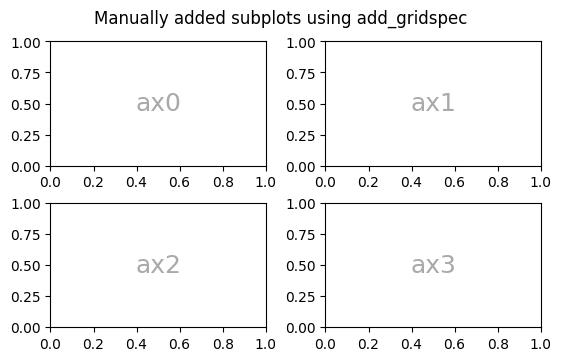

In [16]:
# Low-level and advanced grid methods
# Basic 2x2 grid

fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

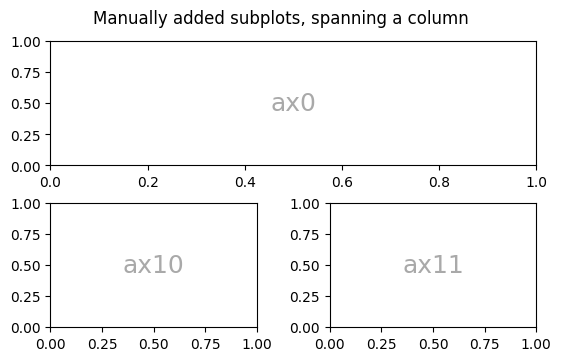

In [17]:
# Axes spanning rows or grids in a grid

fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

fig.suptitle('Manually added subplots, spanning a column')

Text(0.5, 0.98, 'Manual gridspec with right=0.75')

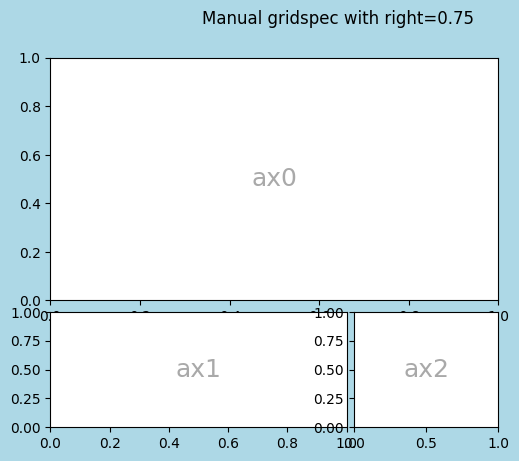

In [18]:
# Manual adjustments to a GridSpec layout

fig = plt.figure(layout=None, facecolor='lightblue')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

Text(0.5, 0.98, 'nested gridspecs')

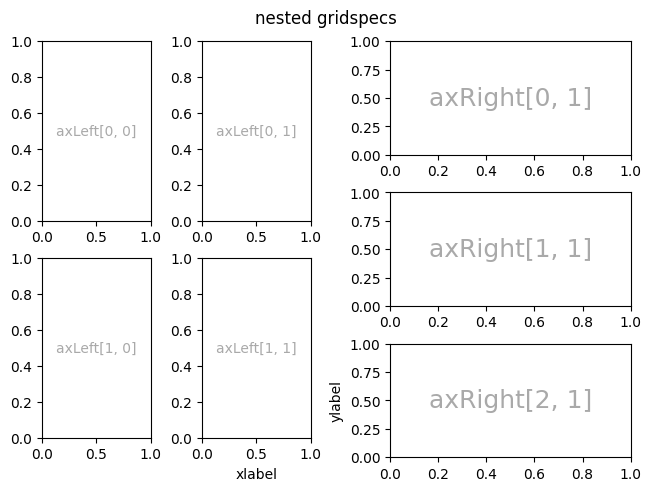

In [20]:
# Nested layouts with SubplotSpec

fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a==2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

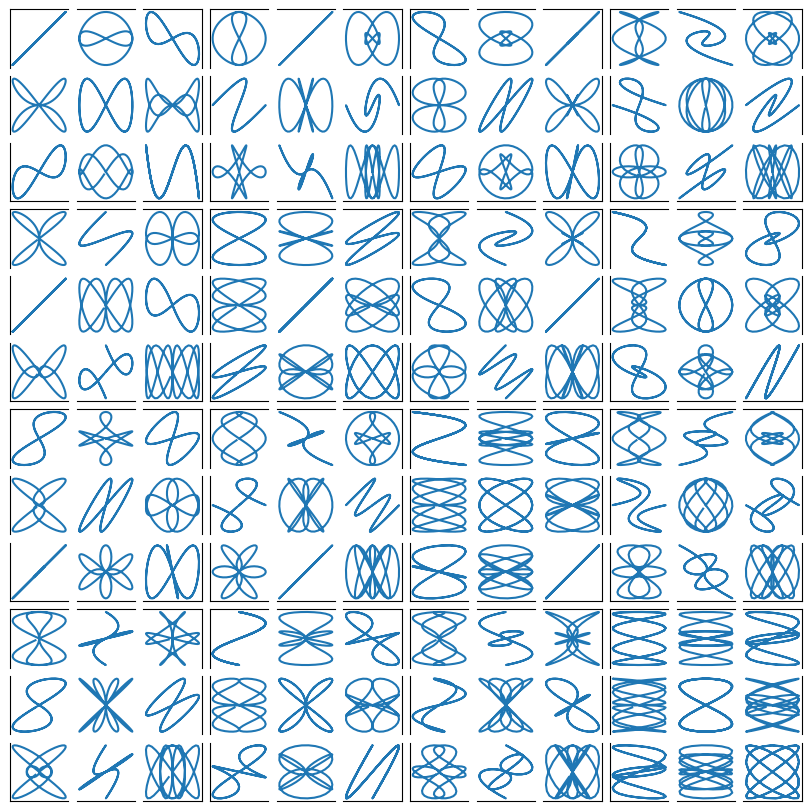

In [21]:
# nested gridspec example

def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), layout='constrained')
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()